### Check the status of NVIDIA GPU

In [1]:
!nvidia-smi

Mon Jul 10 11:50:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install YOLOv7

In [2]:
# Import the os module
import os

# Get the current working directory
HOME = os.getcwd()

# Clone the YOLOv7 repository from GitHub
import subprocess
subprocess.run(['git', 'clone', 'https://github.com/WongKinYiu/yolov7'])

# Navigate to the YOLOv7 directory and checkout a specific commit
os.chdir(os.path.join(HOME, 'yolov7'))
subprocess.run(['git', 'checkout', '44f30af0daccb1a3baecc5d80eae22948516c579'])



CompletedProcess(args=['git', 'checkout', '44f30af0daccb1a3baecc5d80eae22948516c579'], returncode=0)

###Install Requirements

In [3]:

os.chdir(f"{HOME}/yolov7/seg")

# Upgrade pip
!pip install --upgrade pip

# Install required packages
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-bigquery-connection 1.12.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5

### Testing The enviroment
` We will test that all the requirements were installed well so you can skip it if want`

In [4]:
# Change directory to yolov7/seg
os.chdir(f"{HOME}/yolov7/seg")

# Download pre-trained checkpoint file
import urllib.request
url = 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-seg.pt'
urllib.request.urlretrieve(url, 'yolov7-seg.pt')

# Set path to pre-trained checkpoint file
WEIGHTS_PATH = os.path.join(HOME, 'yolov7', 'seg', 'yolov7-seg.pt')

In [5]:
# Change directory to yolov7/seg
os.chdir(f"{HOME}/yolov7/seg")

# Download example image
import urllib.request
url = 'https://www.thetimes.co.uk/imageserver/image/%2Fmethode%2Ftimes%2Fprod%2Fweb%2Fbin%2Fb39cc862-329b-11ec-820f-e2be9b2cb5fd.jpg?crop=2661%2C2661%2C1476%2C646'
urllib.request.urlretrieve(url, 'dog.jpeg')

# Set path to example image
IMAGE_PATH = os.path.join(HOME, 'yolov7', 'seg', 'dog.jpeg')


In [6]:
%cd {HOME}/yolov7/seg
!python segment/predict.py --weights $WEIGHTS_PATH --source $IMAGE_PATH --name coco

/content
segment/predict: weights=['/content/yolov7/seg/yolov7-seg.pt'], source=/content/yolov7/seg/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2023-7-10 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov7-iseg summary: 325 layers, 38268602 parameters, 0 gradients, 143.2 GFLOPs
image 1/1 /content/yolov7/seg/dog.jpeg: 640x640 1 person, 1 dog, 60.8ms
Speed: 0.7ms pre-process, 60.8ms inference, 38.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


In [7]:
RESULT_IMAGE_PATH = f"{HOME}/yolov7/seg/runs/predict-seg/coco/dog.jpeg"

**Now you should see masked photo of a man with a dog**

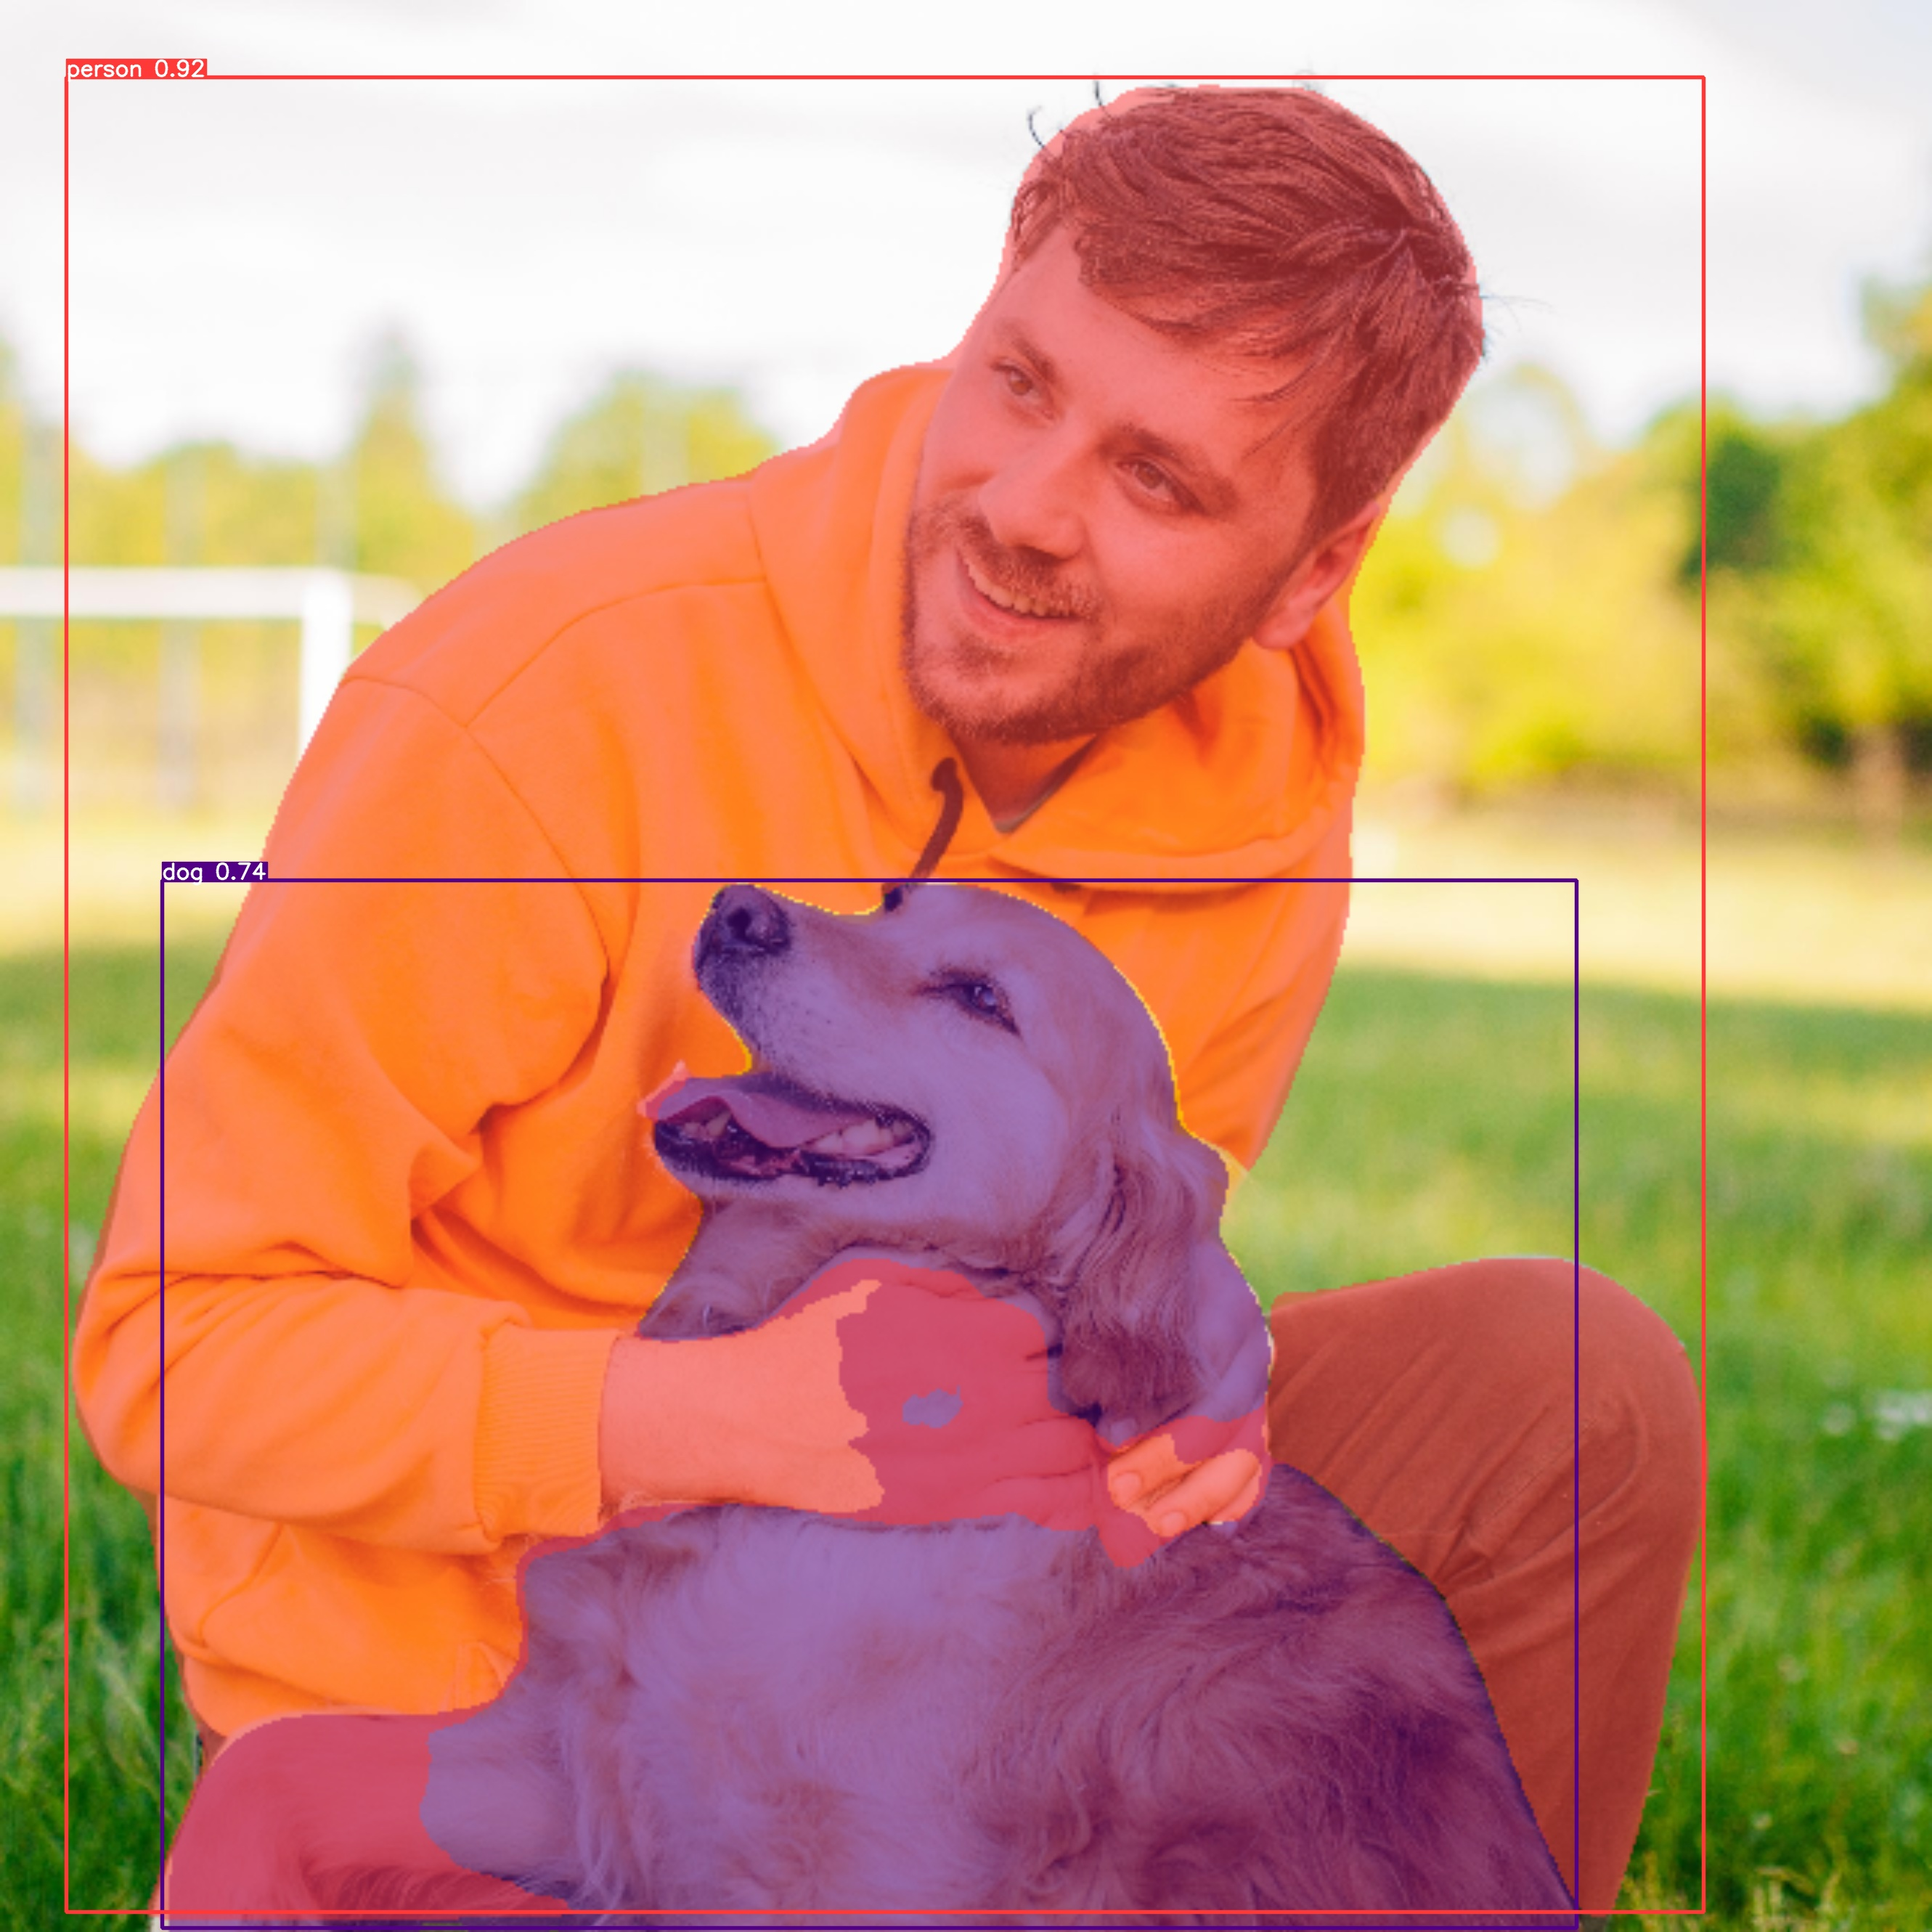

In [8]:
from IPython.display import Image, display

# Display the image
display(Image(filename=RESULT_IMAGE_PATH))

### Download dataset from Roboflow Universe
To find `API KEY` You should make an account on roboflow.com and go to settings and you will find roboflow API in Workplaces Section, copy `Private API Key` and paste it in The input box.

In [ ]:
from getpass import getpass

# copy your API KEY from
api_key = getpass('Enter YOUR_API_KEY secret value: ')

Data set link [From Here](https://universe.roboflow.com/university-bswxt/crack-bphdr/dataset/2)

In [ ]:
# navigate to yolov7/seg directory
%cd {HOME}/yolov7/seg

# install roboflow library
!pip install roboflow --quiet

# import Roboflow library and initialize with API key
from roboflow import Roboflow
rf = Roboflow(api_key=api_key)

# access the specified workspace, project and dataset version and download it
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov7")


/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.4.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to crack-2 in yolov7pytorch:: 100%|██████████| 8070/8070 [00:02<00:00, 3280.48it/s]


In [ ]:
%cd {HOME}/yolov7/seg
!python segment/train.py --batch 16 \
 --epochs 1 \
 --data {dataset.location}/data.yaml \
 --weights $WEIGHTS_PATH \
 --device 0 \
 --name custom


/content
2023-04-11 02:40:41.304111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 02:40:42.237775: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
segment/train: weights=/content/yolov7/seg/yolov7-seg.pt, cfg=, data=/content/yolov7/seg/crack-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, se

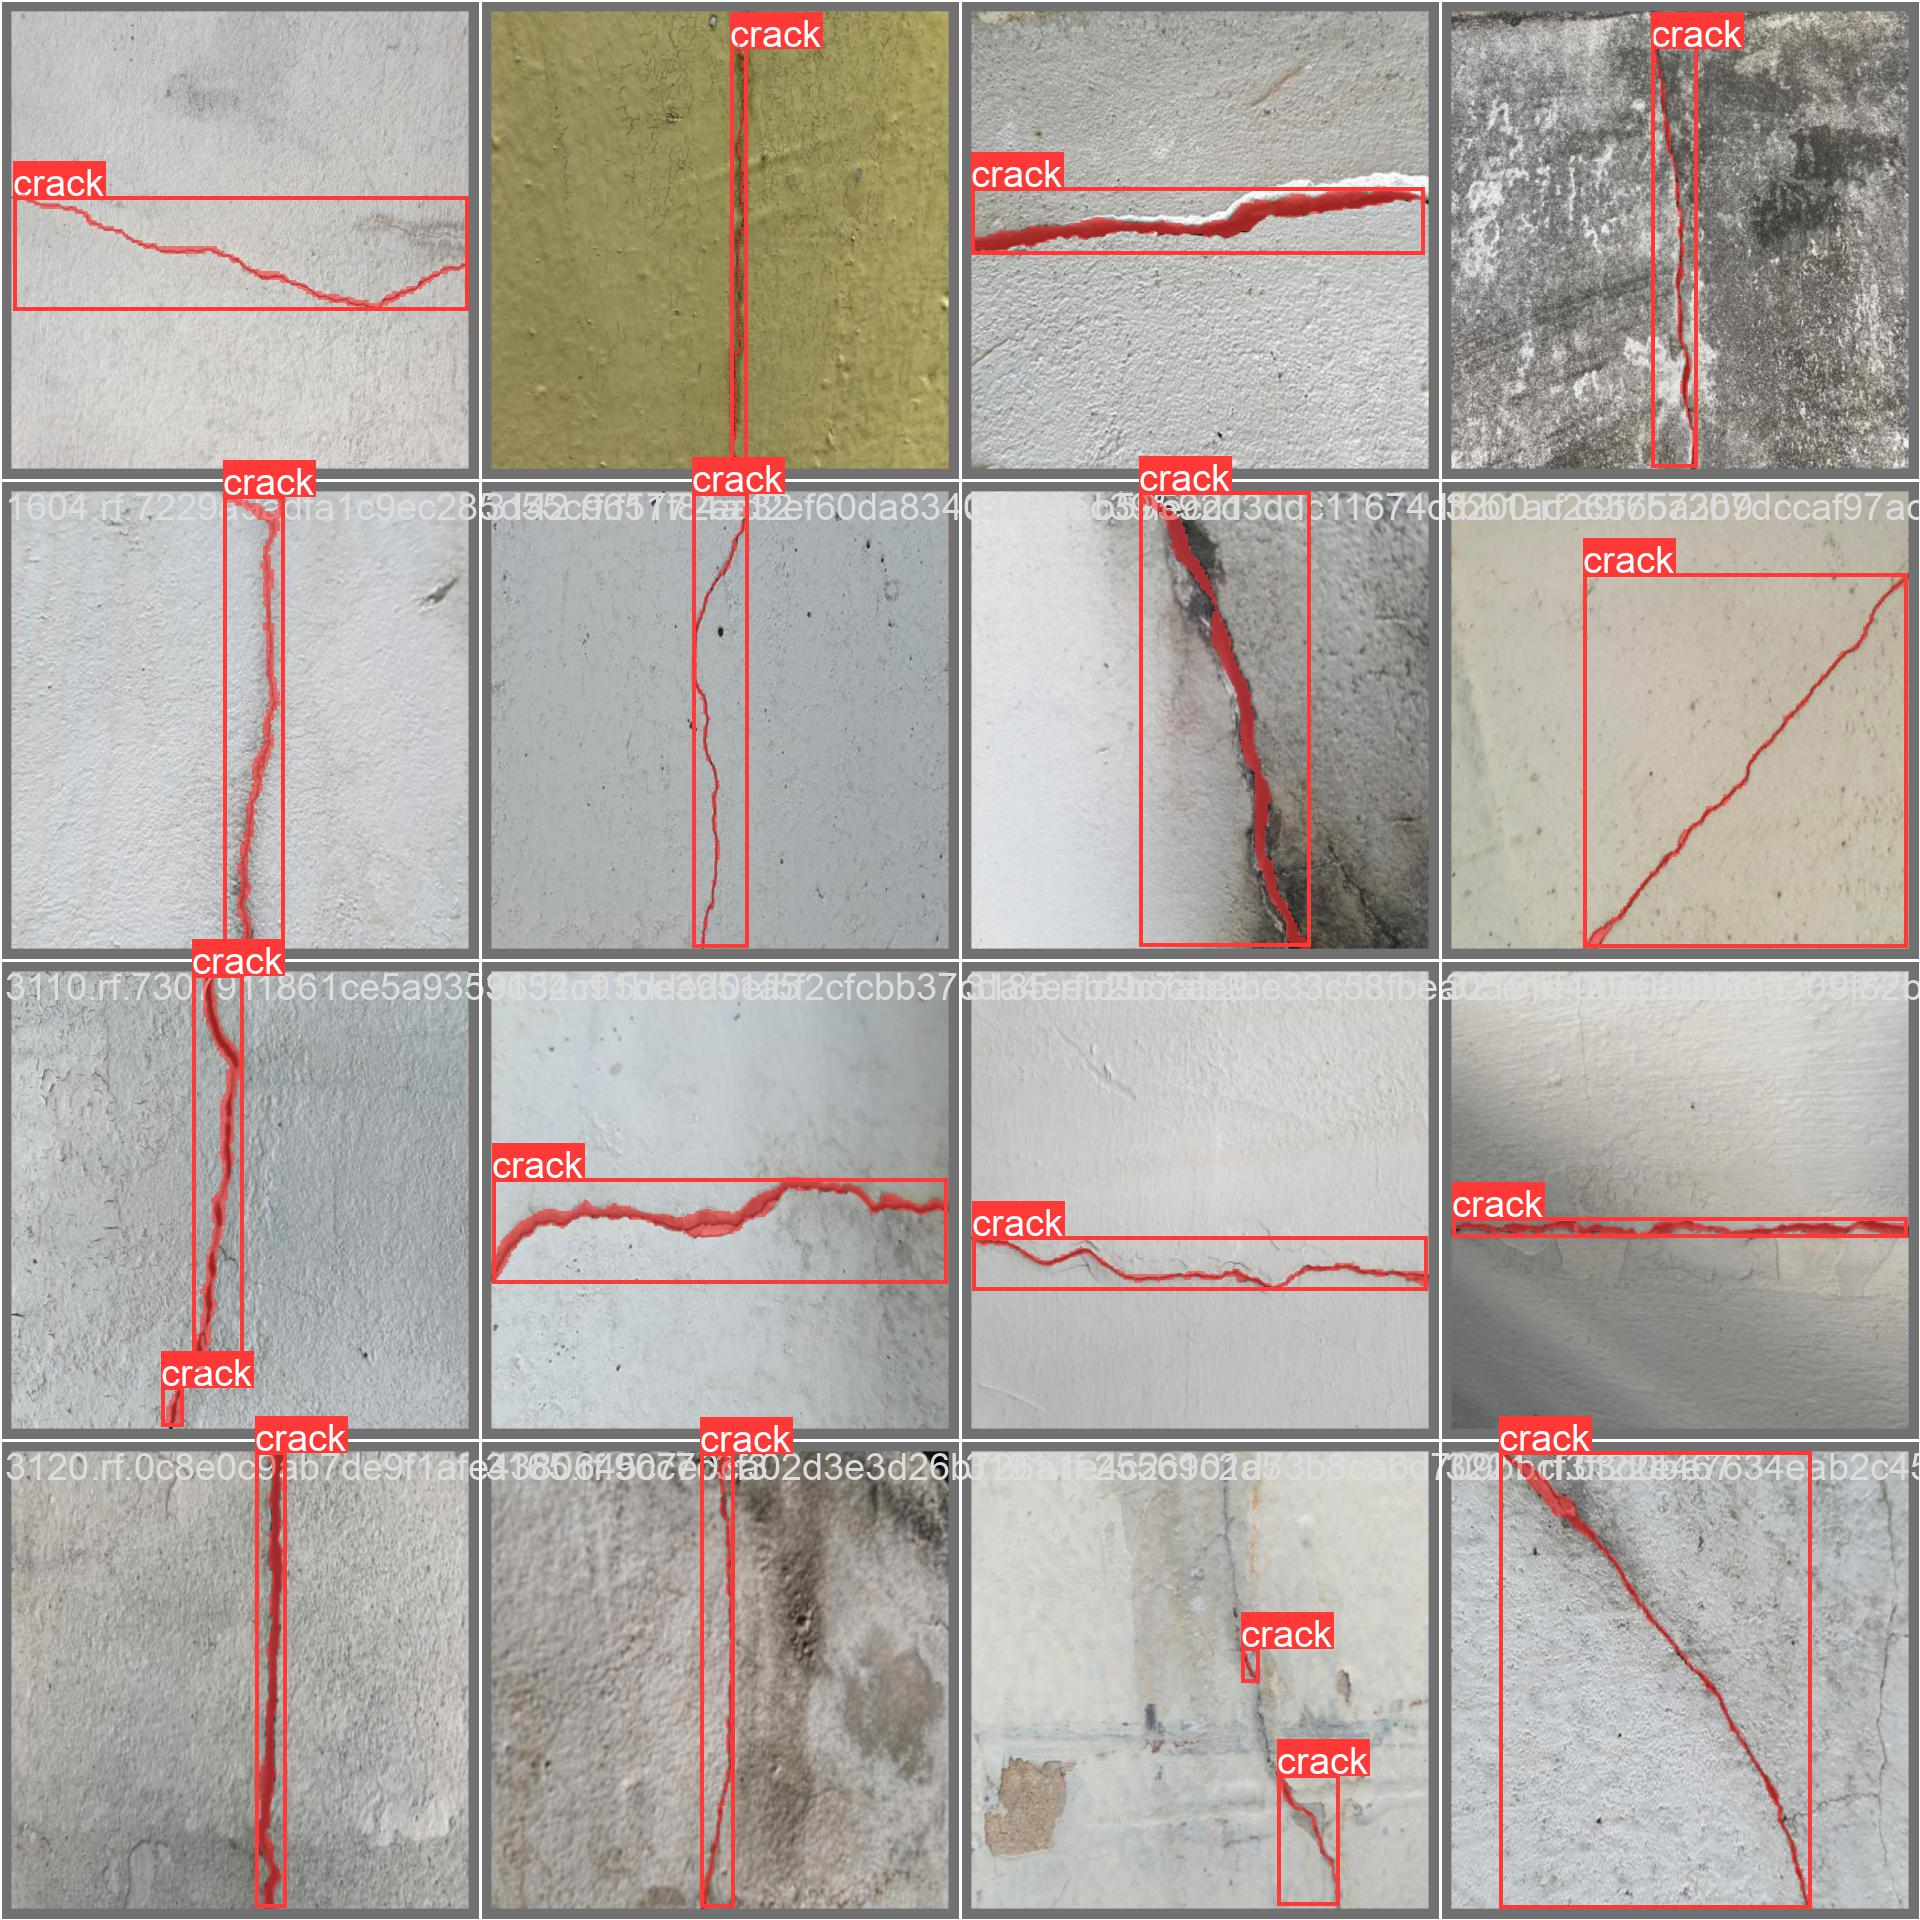

In [ ]:
from IPython.display import Image, display

display(Image(filename=f"{HOME}/yolov7/seg/runs/train-seg/custom/val_batch0_labels.jpg"))

In [ ]:
%cd {HOME}/yolov7/seg
!python segment/predict.py \
--weights {HOME}/yolov7/seg/runs/train-seg/custom/weights/best.pt \
--conf 0.25 \
--source {dataset.location}/test/images

/content
segment/predict: weights=['/content/yolov7/seg/runs/train-seg/custom/weights/best.pt'], source=/content/yolov7/seg/crack-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2023-4-11 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 325 layers, 37842476 parameters, 0 gradients, 141.9 GFLOPs
image 1/112 /content/yolov7/seg/crack-2/test/images/1616.rf.c868709931a671796794fdbb95352c5a.jpg: 640x640 (no detections), 59.5ms
image 2/112 /content/yolov7/seg/crack-2/test/images/1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg: 640x640 (no detections), 52.8ms
image 3/112 /content/yolov7/seg/crack